<a href="https://colab.research.google.com/github/saidfreeds13/socio-spatial-morphology/blob/main/SSM_Diversity_Relationship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Libraries

In [ ]:
pip install esda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
 pip install splot


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.7/325.7 kB 10.2 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
from libpysal.weights import Queen
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
from splot.esda import moran_scatterplot, lisa_cluster

In [ ]:
from esda.moran import Moran

In [ ]:
import pandas as pd

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
import seaborn as sns

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan


In [ ]:
from statsmodels.stats.stattools import durbin_watson


#2. Data import

In [ ]:
data = gpd.read_file("/content/socio_spatial_morph_nradius.geojson")

In [ ]:
data.head()

,richness,shannon wiener,INT,CH,geometry
0,2.0,0.673012,1037.07150,145844.0,"LINESTRING (346291.232 6643044.411, 346297.487..."
1,5.0,1.494175,1036.96680,162037.0,"LINESTRING (346297.487 6643041.52, 346406.272 ..."
2,4.0,1.153742,1038.83130,169074.0,"LINESTRING (346406.272 6642992.519, 346437.171..."
3,3.0,0.898205,847.16010,108591.0,"LINESTRING (347072.044 6642641.283, 347074.353..."
4,4.0,1.046630,844.65131,106043.0,"LINESTRING (347074.353 6642632.357, 347092.202..."


# 3. Spatial analysis of morphological and diversity characteristics of streets

In [ ]:
# Define spatial weights (Queen, rock, knn, w, DistanceBand.from_dataframe)
w = Queen.from_dataframe(data)
w.transform = 'R'

/tmp/ipython-input-193233156.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(data)


('WARNING: ', 714, ' is an island (no neighbors)')
('WARNING: ', 2162, ' is an island (no neighbors)')
('WARNING: ', 2699, ' is an island (no neighbors)')
('WARNING: ', 3040, ' is an island (no neighbors)')
('WARNING: ', 3094, ' is an island (no neighbors)')


/usr/local/lib/python3.12/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 5 islands with ids: 714, 2162, 2699, 3040, 3094.
  W.__init__(self, neighbors, ids=ids, **kw)


##2.1. Diversity index

In [ ]:
# Moran's I
variable = data['shannon wiener']

In [ ]:
# Global Moran's I
moran = Moran(variable, w, permutations=999)

In [ ]:
# Output results
print(f"Moran's I: {moran.I:.3f}")
print(f"p-value: {moran.p_sim:.5f}")
print(f"Variance of Moran's I: {moran.VI_norm:.5f}")

Moran's I: 0.902
p-value: 0.00100
Variance of Moran's I: 0.00020


/usr/local/lib/python3.12/dist-packages/esda/moran.py:1354: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


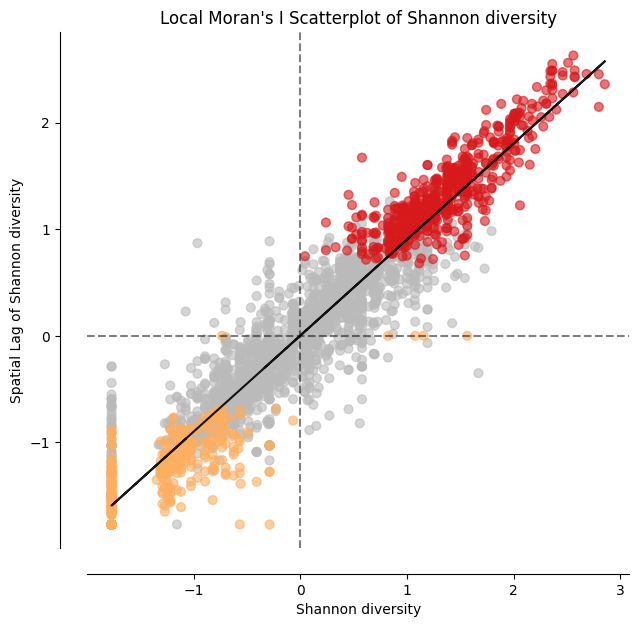

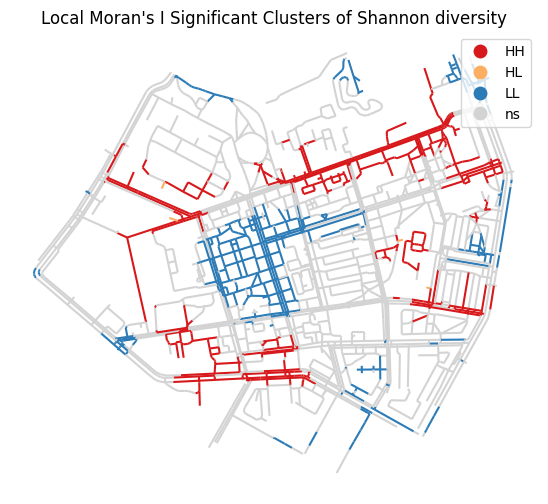

In [ ]:
# Local Moran's I
moran_loc = Moran_Local(variable, w)

# Moran Scatterplot for local Moran's I
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Shannon diversity')
ax.set_ylabel('Spatial Lag of Shannon diversity')
plt.title("Local Moran's I Scatterplot of Shannon diversity")
plt.show()

# Plot significant local clusters map
fig, ax = plt.subplots(1, figsize=(10, 6))
lisa_cluster(moran_loc, data, p=0.05, ax=ax)
plt.title("Local Moran's I Significant Clusters of Shannon diversity")
plt.show()

##2.2 Morphological characteristics

In [ ]:
# Moran's I
variable_1 = data['INT']
variable_2 = data["CH"]

In [ ]:
moran_1 = Moran(variable_1, w, permutations=999)
moran_2 = Moran(variable_2, w, permutations =999)

In [ ]:
# Output results
print(f"Moran's I of INT: {moran_1.I:.3f}")
print(f"p-value of INT: {moran_1.p_sim:.5f}")
print(f"Variance of Moran's I for INT: {moran_1.VI_norm:.5f}")

Moran's I of INT: 0.882
p-value of INT: 0.00100
Variance of Moran's I for INT: 0.00020


In [ ]:
# Output results
print(f"Moran's I of CH: {moran_2.I:.3f}")
print(f"p-value of CH: {moran_2.p_sim:.5f}")
print(f"Variance of Moran's I for CH: {moran_2.VI_norm:.5f}")

Moran's I of CH: 0.566
p-value of CH: 0.00100
Variance of Moran's I for CH: 0.00020


/usr/local/lib/python3.12/dist-packages/esda/moran.py:1354: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


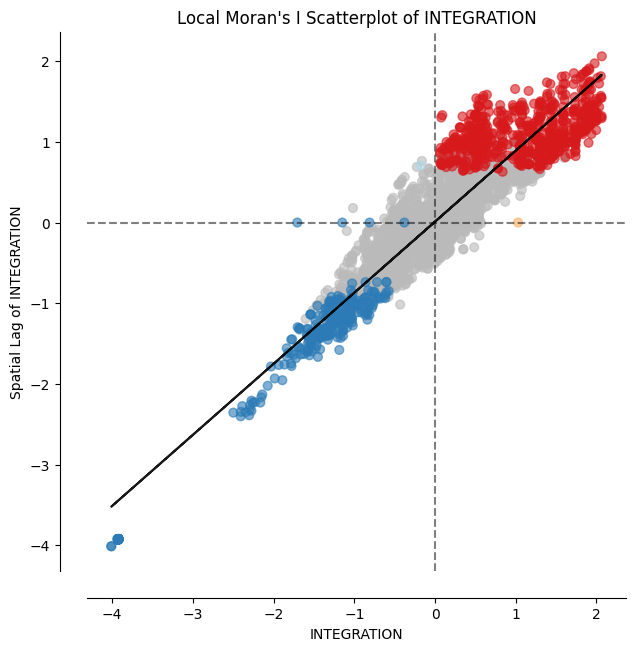

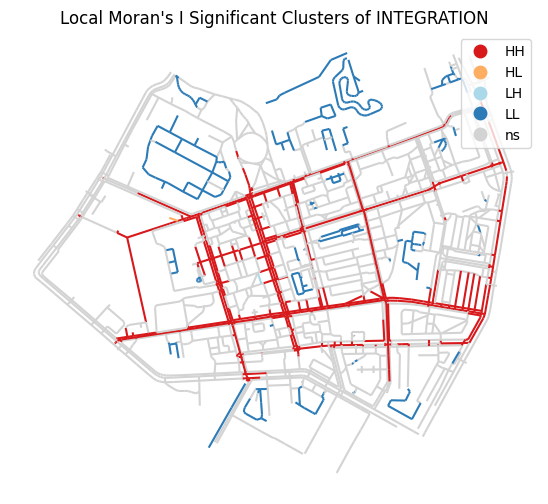

In [ ]:
# Local Moran's I
moran_loc_1 = Moran_Local(variable_1, w)

# Moran Scatterplot for local Moran's I
fig, ax = moran_scatterplot(moran_loc_1, p=0.05)
ax.set_xlabel('INTEGRATION')
ax.set_ylabel('Spatial Lag of INTEGRATION')
plt.title("Local Moran's I Scatterplot of INTEGRATION")
plt.show()

# Plot significant local clusters map
fig, ax = plt.subplots(1, figsize=(10, 6))
lisa_cluster(moran_loc_1, data, p=0.05, ax=ax)
plt.title("Local Moran's I Significant Clusters of INTEGRATION")
plt.show()

/usr/local/lib/python3.12/dist-packages/esda/moran.py:1354: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


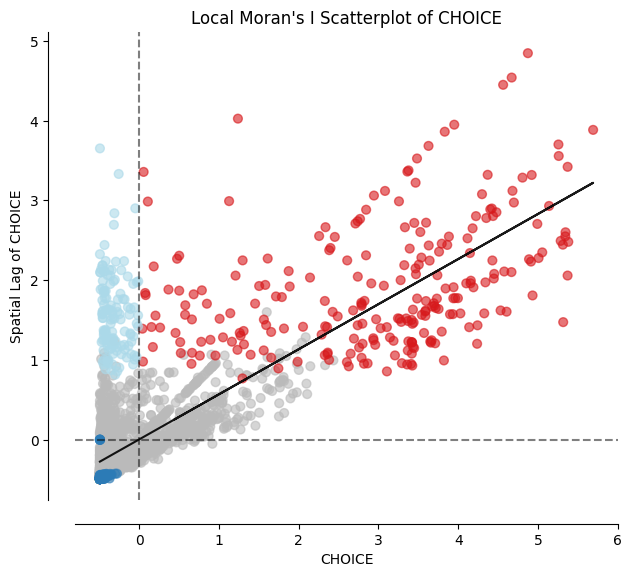

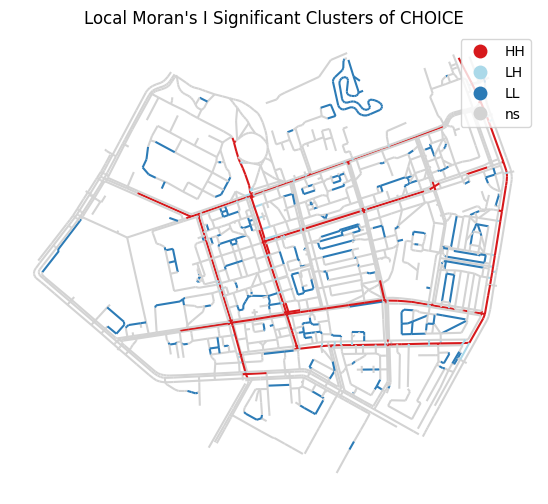

In [ ]:
# Local Moran's I
moran_loc_2 = Moran_Local(variable_2, w)

# Moran Scatterplot for local Moran's I
fig, ax = moran_scatterplot(moran_loc_2, p=0.05)
ax.set_xlabel('CHOICE')
ax.set_ylabel('Spatial Lag of CHOICE')
plt.title("Local Moran's I Scatterplot of CHOICE")
plt.show()

# Plot significant local clusters map
fig, ax = plt.subplots(1, figsize=(10, 6))
lisa_cluster(moran_loc_2, data, p=0.05, ax=ax)
plt.title("Local Moran's I Significant Clusters of CHOICE")
plt.show()

#4. Regression analysis of streets' morphological and diversity characteristics

##Overall OLS model

In [ ]:
data_r = pd.read_csv("/content/ssm_final_nrad.csv")

In [ ]:
data_r["s_w"] = data_r["shannon wiener"]

In [ ]:
data_r.head()

,richness,shannon wiener,INT,CH,s_w
0,2,0.673012,1037.07150,145844,0.673012
1,5,1.494175,1036.96680,162037,1.494175
2,4,1.153742,1038.83130,169074,1.153742
3,3,0.898205,847.16010,108591,0.898205
4,4,1.046630,844.65131,106043,1.046630


In [ ]:
def run_regression(df, formula):

    # Correlation analysis
    print("Correlation coefficients with Y:")
    # Compute correlation of Y with all other variables
    print(df.corr()['shannon wiener'].drop('shannon wiener'))
    print("\n")

    # Fit regression model
    model = smf.ols(formula=formula, data=df).fit()

    print(model.summary())

    # Residuals
    plt.figure(figsize=(10, 6))
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Fitted')
    plt.show()

    # Histogram of residuals
    plt.figure(figsize=(8, 5))
    sns.histplot(model.resid, kde=True)
    plt.title('Histogram of Residuals')
    plt.show()

    # Q-Q plot for normality of residuals
    sm.qqplot(model.resid, line='45')
    plt.title('Q-Q Plot')
    plt.show()

    # Test for heteroscedasticity (Breusch-Pagan)
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    print(f"Breusch-Pagan test: Lagrange multiplier statistic={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")

    # Test for autocorrelation of residuals (Durbin-Watson)
    dw_stat = durbin_watson(model.resid)
    print(f"Durbin-Watson statistic: {dw_stat:.4f}")

Single-Factor Regression
Correlation coefficients with Y:
richness    0.898794
INT         0.001348
CH          0.014094
s_w         1.000000
Name: shannon wiener, dtype: float64


                            OLS Regression Results                            
Dep. Variable:                    s_w   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.005953
Date:                Fri, 03 Oct 2025   Prob (F-statistic):              0.939
Time:                        08:54:49   Log-Likelihood:                -2160.5
No. Observations:                3276   AIC:                             4325.
Df Residuals:                    3274   BIC:                             4337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std 

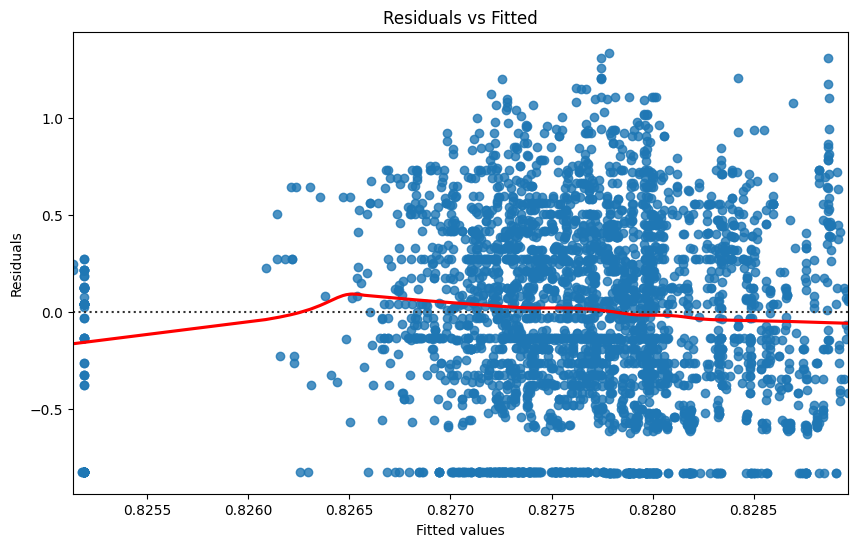

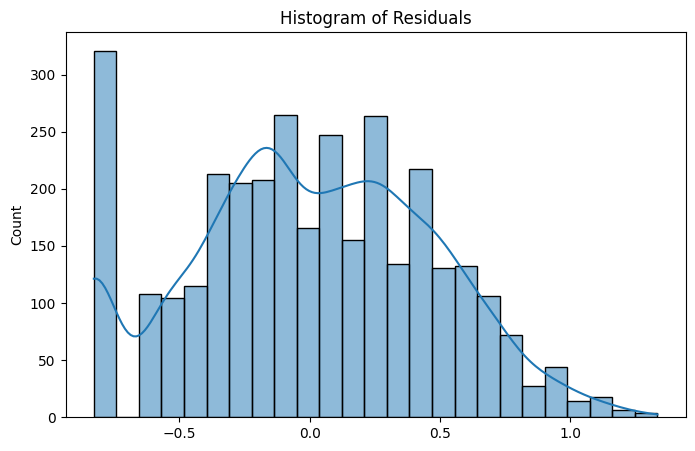

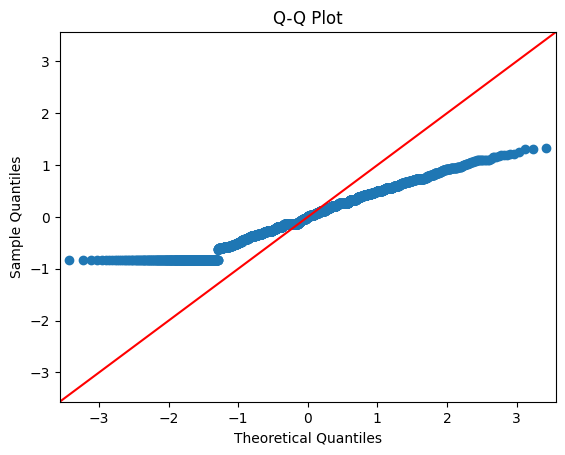

Breusch-Pagan test: Lagrange multiplier statistic=0.0098, p-value=0.9213
Durbin-Watson statistic: 0.5366


In [ ]:
print("Single-Factor Regression")
run_regression(data_r, 's_w ~ INT')


Single-Factor Regression
Correlation coefficients with Y:
richness    0.898794
INT         0.001348
CH          0.014094
s_w         1.000000
Name: shannon wiener, dtype: float64


                            OLS Regression Results                            
Dep. Variable:               richness   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.570
Date:                Fri, 03 Oct 2025   Prob (F-statistic):            0.00142
Time:                        08:56:41   Log-Likelihood:                -6074.7
No. Observations:                3276   AIC:                         1.216e+04
Df Residuals:                    3273   BIC:                         1.217e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std 

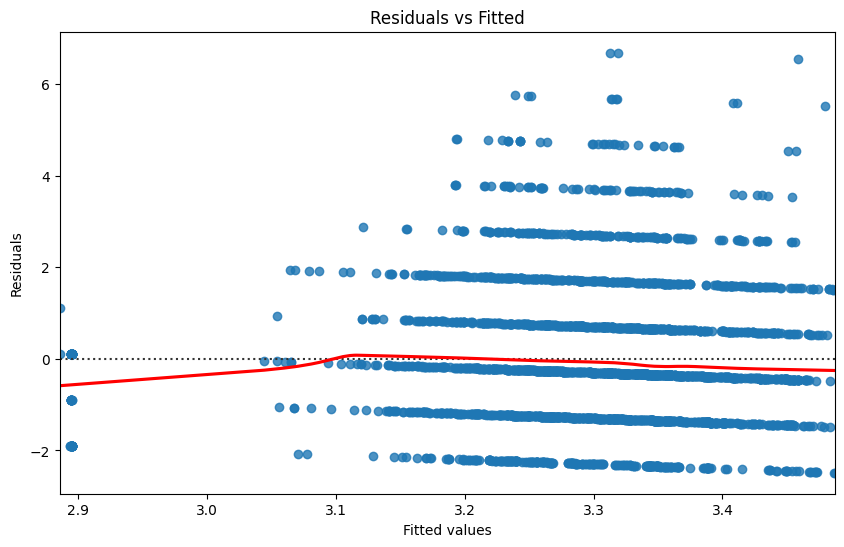

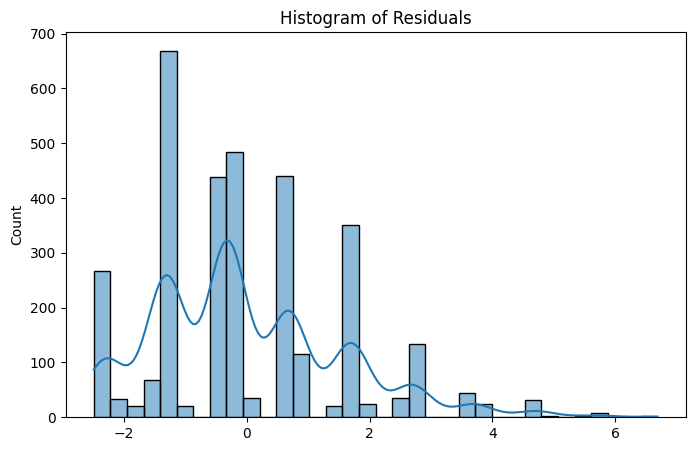

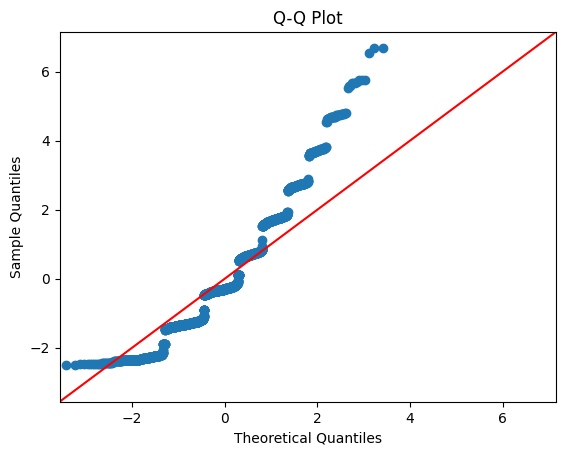

Breusch-Pagan test: Lagrange multiplier statistic=1.4741, p-value=0.4785
Durbin-Watson statistic: 0.5595


In [ ]:
print("Single-Factor Regression")
run_regression(data_r, 'richness ~ INT + CH')